In [ ]:
%pip install pandas

In [ ]:
import pandas as pd

In [ ]:
diabetes_sample = pd.read_csv("diabetes2.csv")
diabetes_sample

,hamilelik,kandaki glukoz,tansiyon,deri kalınlığı,Insulin,BMI,Yaş,genetik yatkınlık,Sonuç
0,6,148,72,35,0,33.60,50,"0,627",1
1,1,85,66,29,0,26.06,31,"0,351",0
2,8,183,64,0,0,23.30,32,"0,672",1
3,1,89,66,23,94,28.10,21,"0,167",0
4,5,116,74,0,0,25.60,30,"0,201",0
...,...,...,...,...,...,...,...,...,...
634,9,89,62,0,0,22.50,33,"0,142",0
635,10,101,76,48,180,32.90,63,"0,171",0
636,5,121,72,23,112,26.20,30,"0,245",0
637,1,126,60,0,0,30.10,47,"0,349",1


In [ ]:
%pip install matplotlip

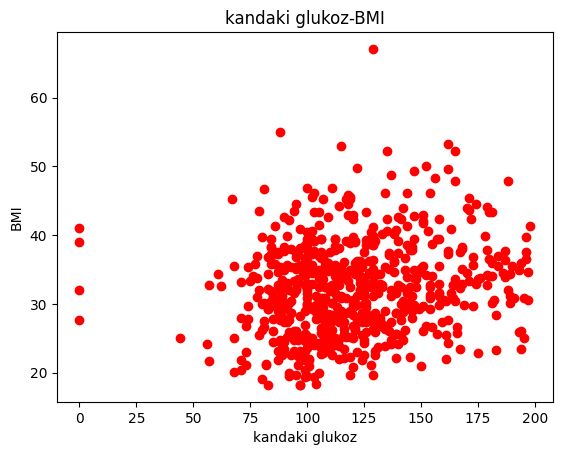

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(diabetes_sample["kandaki glukoz"], diabetes_sample["BMI"], color="red")
plt.xlabel("kandaki glukoz")
plt.ylabel("BMI")
plt.title("kandaki glukoz-BMI")
plt.show()

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(diabetes_sample[['kandaki glukoz', 'BMI']])
diabetes_sample['küme'] = kmeans.predict(diabetes_sample[['kandaki glukoz', 'BMI']])
diabetes_sample

,hamilelik,kandaki glukoz,tansiyon,deri kalınlığı,Insulin,BMI,Yaş,genetik yatkınlık,Sonuç,küme
0,6,148,72,35,0,33.60,50,"0,627",1,4
1,1,85,66,29,0,26.06,31,"0,351",0,1
2,8,183,64,0,0,23.30,32,"0,672",1,2
3,1,89,66,23,94,28.10,21,"0,167",0,1
4,5,116,74,0,0,25.60,30,"0,201",0,0
...,...,...,...,...,...,...,...,...,...,...
634,9,89,62,0,0,22.50,33,"0,142",0,1
635,10,101,76,48,180,32.90,63,"0,171",0,3
636,5,121,72,23,112,26.20,30,"0,245",0,0
637,1,126,60,0,0,30.10,47,"0,349",1,0


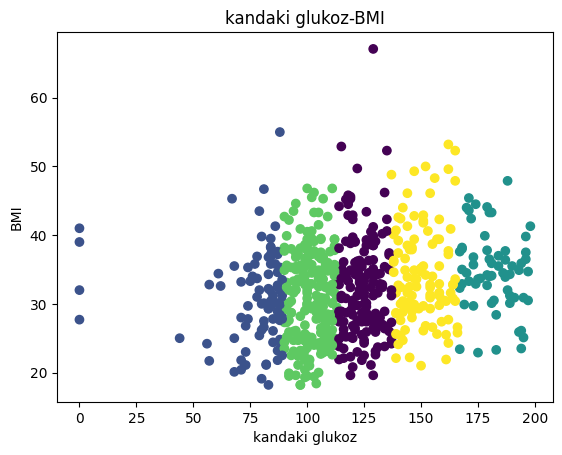

In [ ]:
plt.scatter(diabetes_sample["kandaki glukoz"], diabetes_sample["BMI"], c=diabetes_sample['küme'])
plt.xlabel("kandaki glukoz")
plt.ylabel("BMI")
plt.title("kandaki glukoz-BMI")
plt.show()

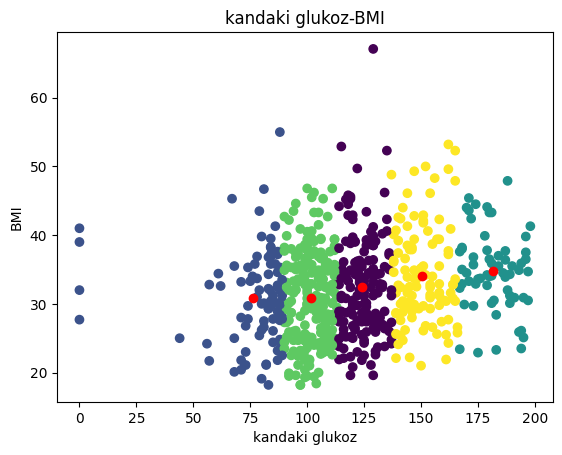

In [ ]:
plt.scatter(diabetes_sample["kandaki glukoz"], diabetes_sample["BMI"], c=diabetes_sample['küme'])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red')
plt.xlabel("kandaki glukoz")
plt.ylabel("BMI")
plt.title("kandaki glukoz-BMI")
plt.show()

In [ ]:
diabetes_sample.to_csv('diabetes2.csv', index=False)

In [ ]:
# cluster number 1 is çok düşük
# cluster number 2 is düşük
# cluster number 3 is orta
# cluster number 4 is yüksek
# cluster number 5 is çok yüksek

diabetes_sample['ŞekerHastasıDurumu'] = diabetes_sample['küme'].replace({0: 'çok düşük', 1: 'düşük', 2: 'orta', 3: 'yüksek', 4: 'çok yüksek'})
diabetes_sample

,hamilelik,kandaki glukoz,tansiyon,deri kalınlığı,Insulin,BMI,Yaş,genetik yatkınlık,Sonuç,küme,ŞekerHastasıDurumu
0,6,148,72,35,0,33.60,50,"0,627",1,4,çok yüksek
1,1,85,66,29,0,26.06,31,"0,351",0,1,düşük
2,8,183,64,0,0,23.30,32,"0,672",1,2,orta
3,1,89,66,23,94,28.10,21,"0,167",0,1,düşük
4,5,116,74,0,0,25.60,30,"0,201",0,0,çok düşük
...,...,...,...,...,...,...,...,...,...,...,...
634,9,89,62,0,0,22.50,33,"0,142",0,1,düşük
635,10,101,76,48,180,32.90,63,"0,171",0,3,yüksek
636,5,121,72,23,112,26.20,30,"0,245",0,0,çok düşük
637,1,126,60,0,0,30.10,47,"0,349",1,0,çok düşük


In [ ]:
diabetes_sample.to_csv('diabetes_sample_etiketli.csv', index=False)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(diabetes_sample[["kandaki glukoz"]], diabetes_sample["BMI"])

LinearRegression()

In [ ]:
tahmin_edilen_degerler = model.predict(diabetes_sample[["kandaki glukoz"]])
tahmin_edilen_degerler

array([33.32793639, 30.7751607 , 34.7461451 , 30.9372417 , 32.03128842,
       30.49151896, 31.99076817, 35.31342858, 31.78816693, 34.13834136,
       34.98926659, 34.05730087, 31.38296444, 32.11232892, 31.66660618,
       31.50452518, 31.99076817, 32.43649091, 31.34244419, 35.27290833,
       32.15284917, 33.12533514, 32.39597066, 33.28741614, 31.26140369,
       33.20637564, 32.07180867, 31.74764668, 33.73313887, 30.89672145,
       31.05880244, 32.27440991, 31.50452518, 31.46400493, 30.97776195,
       34.62458435, 32.72013265, 31.62608593, 34.25990211, 33.77365912,
       33.24689589, 30.20787722, 31.50452518, 31.50452518, 31.42348469,
       30.89672145, 34.46250336, 33.40897688, 30.28891772, 34.90822609,
       31.38296444, 31.58556568, 29.1138305 , 33.04429464, 31.95024792,
       31.34244419, 31.74764668, 31.74764668, 31.18036319, 33.24689589,
       31.38296444, 32.96325414, 32.43649091, 32.55805166, 30.53203921,
       29.84319498, 31.86920742, 30.6941202 , 31.42348469, 32.88

In [ ]:
model.coef_, model.intercept_

(array([0.04052025]), 27.330939542724096)

In [ ]:
model.predict([[1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([27.37145979])

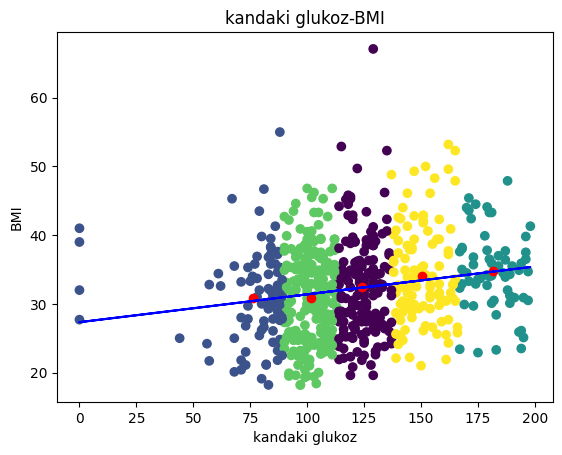

In [ ]:
plt.scatter(diabetes_sample["kandaki glukoz"], diabetes_sample["BMI"], c=diabetes_sample['küme'])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red')
plt.plot(diabetes_sample["kandaki glukoz"], tahmin_edilen_degerler, color="blue")
plt.xlabel("kandaki glukoz")
plt.ylabel("BMI")
plt.title("kandaki glukoz-BMI")
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')